In [1]:
from sklearn.ensemble import RandomForestRegressor

#the error metric we will be using here is C-stat(ROC/AUC)
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

x= pd.read_csv("Titanic.csv")
x.describe()
y=x.pop("Survived")
from IPython.display import display, HTML
display(x)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
print("shape of data is :",x.shape)

shape of data is : (891, 11)


In [5]:
#impute Age with Median as it is skewed
x["Age"].fillna(x.Age.median(), inplace=True)
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#get just the numeric variables by selecting only those variables that are not "object" datatype. 
numeric_variables= list(x.dtypes[x.dtypes != "object"].index)
x[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [7]:
#fitting a general model and evaluating its C-stat score
model = RandomForestRegressor(n_estimators = 100, oob_score=True, random_state=42)

# I only use numeric variables as i'm yet to dummy out the categorical variables
model.fit(x[numeric_variables],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [8]:
#For regression the oob_score_ attribute gives the R^2 based on oob predictions
model.oob_score_

0.1333530526375064

In [9]:
#This is our initial C-stat score.
y_oob = model.oob_prediction_
print ("C-stat: ", roc_auc_score(y,y_oob))

C-stat:  0.7392681004271455


In [10]:
#let's do data assessment and explortory data analysis and see how much we can improve our model.

In [11]:
#Dropping Variables that are not significant intuitively
x.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)
#x.describe()
print(x.shape)

(891, 8)


In [12]:
#Change the Cabin variables to be only the first letter or None
def clean_cabin(X):
    try:
        return X[0]
    except TypeError:
        return "None"
x["Cabin"]=x.Cabin.apply(clean_cabin)

In [13]:
print('Any null values in data? : ',x.isnull().values.any())

Any null values in data? :  True


In [14]:
from IPython.display import display, HTML
display(x)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,None,S
1,1,female,38.0,1,0,71.2833,C,C
2,3,female,26.0,0,0,7.9250,None,S
3,1,female,35.0,1,0,53.1000,C,S
4,3,male,35.0,0,0,8.0500,None,S
5,3,male,28.0,0,0,8.4583,None,Q
6,1,male,54.0,0,0,51.8625,E,S
7,3,male,2.0,3,1,21.0750,None,S
8,3,female,27.0,0,2,11.1333,None,S
9,2,female,14.0,1,0,30.0708,None,C


In [15]:
categorical_variables=["Sex", "Cabin", "Embarked"]
for i in categorical_variables:
    #Fill missing data with "missing"
    x[i].fillna("missing", inplace=True)
       # Create array of dummies
    dummies=pd.get_dummies(x[i], prefix=i)
    #update x to include dummies and drop the main variable
    x = pd.concat([x, dummies], axis=1)
    x.drop([i], axis=1, inplace=True)
print(x.shape)

(891, 20)


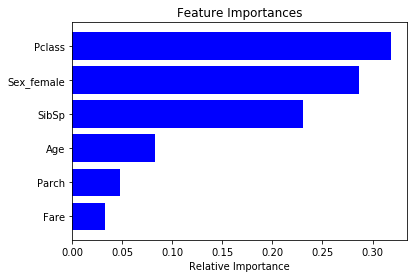

In [16]:
features=list(x.columns)
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
from IPython.display import display, HTML
display(x)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,3,28.0,0,0,8.4583,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
6,1,54.0,0,0,51.8625,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
7,3,2.0,3,1,21.0750,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,3,27.0,0,2,11.1333,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9,2,14.0,1,0,30.0708,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [18]:
print('Any null values in data? : ',x.isnull().values.any())

Any null values in data? :  False


In [19]:
print('Initial multicollinearity in data')
pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

Initial multicollinearity in data


C:\Users\18482\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Pclass              2.942121
Age                 1.240622
SibSp               1.295656
Parch               1.339428
Fare                1.843495
Sex_female               inf
Sex_male                 inf
Cabin_A                  inf
Cabin_B                  inf
Cabin_C                  inf
Cabin_D                  inf
Cabin_E                  inf
Cabin_F                  inf
Cabin_G                  inf
Cabin_None               inf
Cabin_T                  inf
Embarked_C               inf
Embarked_Q               inf
Embarked_S               inf
Embarked_missing         inf
dtype: float64

In [20]:
#removing highly collinear variables
x.drop(["Cabin_A", "Embarked_missing","Embarked_S","Cabin_None","" "Sex_female"], axis=1, inplace=True)
#x.describe()
print(x.shape)

(891, 15)


In [21]:
print('Final multicollinearity in data')
pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

Final multicollinearity in data


Pclass        5.855994
Age           5.165493
SibSp         1.582125
Parch         1.632818
Fare          2.375505
Sex_male      3.129723
Cabin_B       1.463138
Cabin_C       1.484828
Cabin_D       1.179493
Cabin_E       1.125232
Cabin_F       1.016599
Cabin_G       1.026289
Cabin_T       1.007754
Embarked_C    1.368392
Embarked_Q    1.202147
dtype: float64

In [22]:
from IPython.display import display, HTML
display(x)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q
0,3,22.0,1,0,7.2500,1,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,0
4,3,35.0,0,0,8.0500,1,0,0,0,0,0,0,0,0,0
5,3,28.0,0,0,8.4583,1,0,0,0,0,0,0,0,0,1
6,1,54.0,0,0,51.8625,1,0,0,0,1,0,0,0,0,0
7,3,2.0,3,1,21.0750,1,0,0,0,0,0,0,0,0,0
8,3,27.0,0,2,11.1333,0,0,0,0,0,0,0,0,0,0
9,2,14.0,1,0,30.0708,0,0,0,0,0,0,0,0,1,0


In [23]:
model.feature_importances_

array([0.31824145, 0.08276345, 0.23049385, 0.04839289, 0.03330429,
       0.28680407])

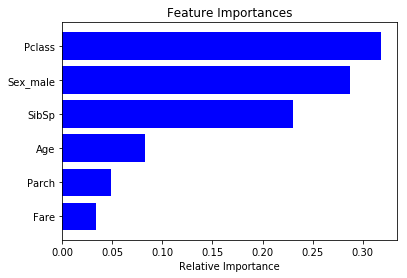

In [24]:
features=list(x.columns)
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [26]:
#n_jobs

In [25]:
%%timeit
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X_train,y_train)

321 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%%timeit
model = RandomForestRegressor(100, oob_score=True, n_jobs=1, random_state=42)
model.fit(X_train,y_train)

302 ms ± 6.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
#n_estimators

30 trees
C-stat: 0.8401545303595417

50 trees
C-stat: 0.8504801955827013

100 trees
C-stat: 0.8517901991706092

200 trees
C-stat: 0.8545562258546314

500 trees
C-stat: 0.8529833871519521

1000 trees
C-stat: 0.8528916034610794

2000 trees
C-stat: 0.8511268534047576



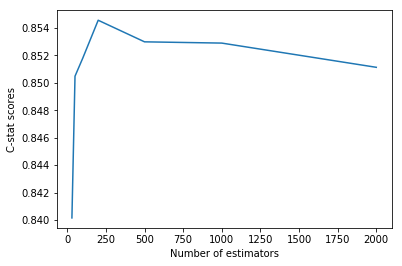

In [28]:
results=[]
n_estimator_options = [30,50,100,200,500,1000,2000]

for T in n_estimator_options:
    model = RandomForestRegressor(T, oob_score=True, n_jobs=1, random_state=42)
    model.fit(X_train,y_train)
    print (T, "trees")
    roc=roc_auc_score(y_train,model.oob_prediction_)
    print ("C-stat:",roc) 
    results.append(roc)
    print ("")
    
pd.Series(results,n_estimator_options).plot()
plt.xlabel('Number of estimators')
plt.ylabel('C-stat scores');

In [103]:
##Max Features

auto option
C-stat: 0.8535841531285724

None option
C-stat: 0.8535841531285724

sqrt option
C-stat: 0.8524660608943068

log2 option
C-stat: 0.8524660608943068



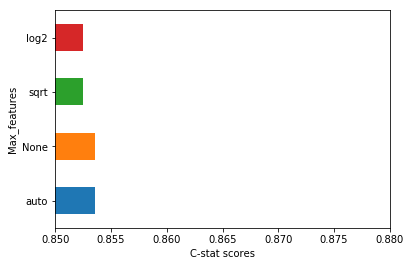

In [29]:
results=[]
max_features_options = ["auto",None,"sqrt","log2"]

for M in max_features_options:
    model = RandomForestRegressor(n_estimators=250, oob_score=True, n_jobs=1, random_state=42,max_features=M)
    model.fit(X_train,y_train)
    print (M, "option")
    roc=roc_auc_score(y_train,model.oob_prediction_)
    print ("C-stat:",roc) 
    results.append(roc)
    print ("")
    
pd.Series(results,max_features_options).plot(kind="barh", xlim=(.85,.88))
plt.xlabel('C-stat scores')
plt.ylabel('Max_features');

In [120]:
##min_leaf_sample

1 min samples
C-stat: 0.8535841531285724

2 min samples
C-stat: 0.8549442205478651

3 min samples
C-stat: 0.8555074386509467

4 min samples
C-stat: 0.8570510734519845

5 min samples
C-stat: 0.8586072242108689

6 min samples
C-stat: 0.858690663929844

7 min samples
C-stat: 0.8585112685340477

8 min samples
C-stat: 0.8575517117658348

9 min samples
C-stat: 0.8546146336579137



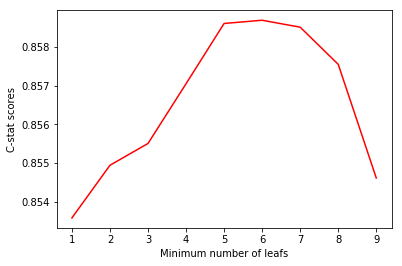

In [30]:
results=[]
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9]

for min_samp in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=250, oob_score=True, n_jobs=1, random_state=42,max_features="auto",min_samples_leaf=min_samp)
    model.fit(X_train,y_train)
    print (min_samp, "min samples")
    roc=roc_auc_score(y_train,model.oob_prediction_)
    print ("C-stat:",roc) 
    results.append(roc)
    print ("")
    
pd.Series(results,min_samples_leaf_options).plot(color='r')
plt.xlabel('Minimum number of leafs')
plt.ylabel('C-stat scores');

In [122]:
#Final Model

In [31]:
model = RandomForestRegressor(n_estimators=250, oob_score=True, n_jobs=1, random_state=42,max_features="auto",min_samples_leaf=6)
model.fit(X_train,y_train)
roc=roc_auc_score(y_train,model.oob_prediction_)
print ("C-stat:",roc)

C-stat: 0.858690663929844


In [107]:
y_pred = model.predict(X_test)

In [108]:
#Finding error metrics of test data
from sklearn import metrics
print('Root mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean squared error:  0.34326489371302665


In [163]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error:  0.2661661826470481
